# Predicting Housing Prices using Regression Analysis
The purpose of this analysis is to predict housing prices for homes in Ames, Iowa. 

First, I need to import relevant packages.

In [129]:
import pandas as pd
import numpy as np

# Dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Models 
from sklearn.ensemble import GradientBoostingRegressor

# Validation and splitting packages
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Graphing packages 
import seaborn as sb
sb.set(context="paper", font="monospace")
import matplotlib.pyplot as plt
%matplotlib inline


Next, I'm importing the datasets

In [118]:
training = pd.read_csv('~/Downloads/train.csv')
test = pd.read_csv('~/Downloads/test (1).csv')

In [119]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
train_y = training['SalePrice']
train_x = training.drop(['SalePrice'],axis=1)

In [121]:
train_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [122]:
print ('There are {} records in the training set.'.format(train_x.shape[0]))
print ('There are {} features in the training set.'.format(train_x.drop(['Id'],axis=1).shape[1]))

There are 1460 records in the training set.
There are 79 features in the training set.


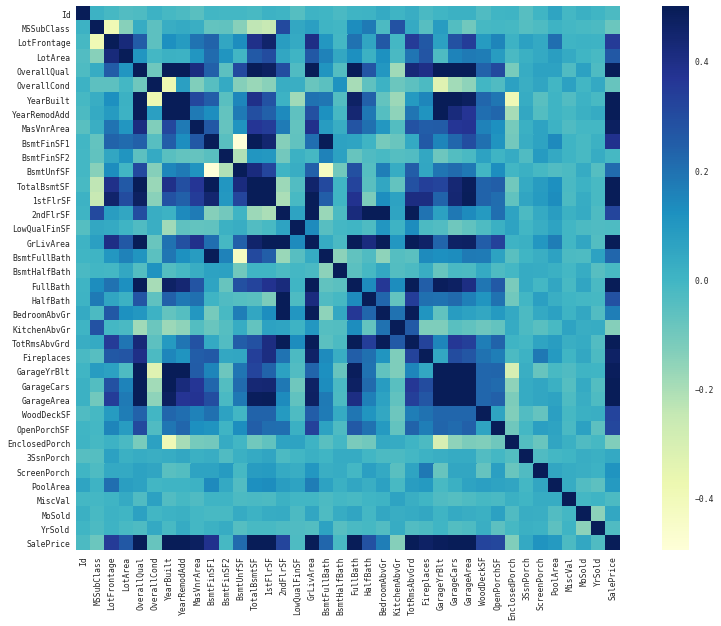

In [125]:
corrmat = training.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=0.5, square=True,center=0,cmap="YlGnBu")

Many of the variables are highly correlated with the target variable, and with each other. I'll need to figure out how to drop some of those more co-linear variables in order to reduce overfitting

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ..., 
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [134]:
dummy_training = pd.get_dummies(train_x)

In [136]:
dummy_training[dummy_training.isnull().any(axis=1)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,...,0,0,0,1,0,0,0,0,1,0
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,...,0,0,0,1,0,0,0,0,1,0
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,...,0,0,0,1,0,0,0,0,1,0
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,...,0,0,0,1,0,0,0,0,1,0
31,32,20,NaN,8544,5,6,1966,2006,0.0,0,...,0,0,0,1,0,0,0,0,1,0
39,40,90,65.0,6040,4,5,1955,1955,0.0,0,...,0,0,0,1,0,1,0,0,0,0
42,43,85,NaN,9180,5,7,1983,1983,0.0,747,...,0,0,0,1,0,0,0,0,1,0
43,44,20,NaN,9200,5,6,1975,1980,0.0,280,...,0,0,0,1,0,0,0,0,1,0
48,49,190,33.0,4456,4,5,1920,2008,0.0,0,...,0,1,0,0,0,0,0,0,0,1


In [137]:
# There are a lot of missing values- LotFrontage, which is the linear feet of street connected to the propery
# I'm first going to try dropping columns with NA's - need to check how correlated they are but first step drop
dummy_training.drop(['LotFrontage','MasVnrArea','GarageYrBlt'],axis=1,inplace=True)

In [148]:
dummy_training[dummy_training.isnull().any(axis=1)]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


Because the data set has so many features, I want to try some feature selection techniques to reduce the dimensionality a bit, and therefore reduce overfitting in the final model.

In [149]:
# First, Principal Component Analysis
pca = PCA()
dummy_fit = pca.fit(dummy_training.drop(['Id'],axis=1))

In [63]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

In [64]:
hpa = horn_parallel_analysis(dummy_training.drop(['Id'],axis=1).shape, percentile=95)

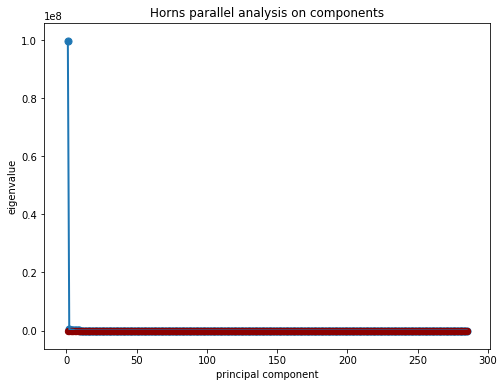

In [65]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(1, dummy_training.drop(['Id'],axis=1).shape[1]+1), dummy_fit.explained_variance_, lw=2)
ax.scatter(range(1, dummy_training.drop(['Id'],axis=1).shape[1]+1), dummy_fit.explained_variance_, s=50)

ax.plot(range(1, len(hpa)+1), hpa, lw=2, color='darkred')
ax.scatter(range(1, len(hpa)+1), hpa, s=40, color='darkred')


ax.set_title('Horns parallel analysis on components')
ax.set_xlabel('principal component')
ax.set_ylabel('eigenvalue')
plt.show()

In [70]:
housing_pcs = pca.transform(dummy_training.drop(['Id'],axis=1))
housing_pcs

array([[ -2.06571643e+03,   3.83397591e+00,  -2.86690461e+02, ...,
          2.43511808e-16,  -2.87096735e-16,   2.91274986e-13],
       [ -9.11853216e+02,  -1.02221499e+00,   7.44212239e+02, ...,
          6.84131571e-16,   3.55618313e-17,  -3.19643752e-12],
       [  7.34054954e+02,   7.91857548e+01,  -4.72995627e+02, ...,
          3.37186876e-16,  -4.53630189e-16,  -2.29249609e-13],
       ..., 
       [ -1.45791134e+03,   6.63481149e+02,  -1.00581603e+03, ...,
          5.27139096e-16,  -7.72819309e-16,   1.13847490e-12],
       [ -8.09680689e+02,  -6.25464450e+02,   3.03396777e+02, ...,
         -9.30245464e-17,   1.66967135e-15,  -7.66207891e-13],
       [ -5.75823558e+02,  -1.04799468e+02,   7.02836107e+02, ...,
          4.53413349e-16,   2.99239800e-16,   7.40985784e-13]])

In [72]:
pca_dataframe = pd.DataFrame(housing_pcs, columns=['PC'+str(i) for i in range(1, housing_pcs.shape[1]+1)])

columns_ = pca_dataframe.columns.tolist()
exclude_cols = pca_dataframe.columns[15:]

predictors_PC = pca_dataframe[[i for i in columns_ if i not in exclude_cols]]
predictors_PC = predictors_PC.values

In [77]:

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA= train_test_split(predictors_PC, train_y, train_size=.75, random_state=1)

# Show the results of the split
print ("Training set has {} samples.".format(X_train_PCA.shape[0]))
print ("Testing set has {} samples.".format(X_test_PCA.shape[0]))

Training set has 1095 samples.
Testing set has 365 samples.


In [102]:
gradient_booster =  GradientBoostingRegressor(random_state=42)

params = [{'max_depth':[2,3,4,5,6,7,8,9]},{'n_estimators':[25,50,100,150,200,300,400]},
              {'learning_rate':[.001,.01,.095,.1,.105,.15,.2]}]

GB_gs_pc = GridSearchCV(gradient_booster, params, cv=5, verbose=1)
GB_gs_pc.fit(X_train_PCA, y_train_PCA)

print (GB_gs_pc.best_params_)
best_GB_pc = GB_gs_pc.best_estimator_

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:   25.5s finished


{'n_estimators': 400}


In [103]:
best_GB_pc

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [104]:
preds = best_GB_pc.predict(X_test_PCA)

In [105]:
mean_squared_error(y_test_PCA,preds)

1869474617.7802901

array([ 205249.3139114 ,  158474.57121391,  115539.32076319,
         76247.91626402,  157661.69409045,  324426.81656568,
        285364.86859551,  141441.1268749 ,  216591.50468241,
        260006.64858621,  225658.17689047,   83952.81411388,
        183755.14835696,  245652.78107145,  277542.65507602,
        115726.00023817,  120218.56215781,  151512.88890128,
        209060.06930439,  134236.34473776,  118934.41133852,
        133132.65016132,  289152.66549384,  310288.70400169,
         85670.54544388,  196917.77915008,  117098.08984779,
        200234.36280846,  481204.74805265,  164057.25091092,
        191227.50943637,  103939.06320738,  109839.28237239,
        108899.57061038,  147016.8542778 ,  327377.37697283,
        124548.67373612,   62803.27336686,  314150.37935487,
        141308.37998583,  177898.49305607,  136287.97479727,
         99248.95391254,  115911.44109951,  183925.98408678,
        250393.96506446,   94134.40350723,  152171.0258889 ,
        234349.59238219,